# heart-attack-analysis: EDA + Classification

## 1. Intro

I found this dataset on Kaggle (https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

This dataset contains information about people and there chances of having a heart stroke.

### 1.1. Main Goal

The main goals are:
* perform an Exploratory Data Analysis;
* build a classification model to predict possible heart attack

### 1.2. Benefits

The benefits of this analysis are:
* Doctors could use prepared model to check possible heart attack in patient
* Any person can use our model to check if this person in a "risk" group by adding input data

### 1.3. Dataset description

This dataset contains information about people and there chances of having a heart attack.


`age` - Age of the patient: binary

`sex` - Sex of the patient: int

`cp` - Chest pain type: int

* 0 = Typical Angina,
* 1 = Atypical Angina,
* 2 = Non-anginal Pain,
* 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg): int

`chol` - Cholestoral in mg/dl fetched via BMI sensor: int

`fbs` - (fasting blood sugar > 120 mg/dl): binary
* 1 = True,
* 0 = False

`restecg` - Resting electrocardiographic results: int
* 0 = Normal,
* 1 = ST-T wave normality,
* 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved : int

`oldpeak` - Previous peak: float

`slp` - Slope: inint in [0,1,2]

`caa` - Number of major vessels: int in [0,1,2]

`thall` - Thalium Stress Test result: int in [0,1,2,3]

`exng` - Exercise induced angina: binary
* 1 = Yes,
* 0 = No

`output` - Target variable: int
* 1 = Yes
* 0 = No

####

### 1.4. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2. Data description and data cleaning


### Load the dataset:

In [2]:
df = pd.read_csv("data/heart.csv")

### 2.1. Data description

Here we get some basic information about data, data types and values

#### First 5 rows of the data:

In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Shape of the dataset

In [10]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


#### Types of data

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

All datatypes are numeric, but soome of them also categorical.

#### Unique values

In [15]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


#### Separating columns:


Dataset has several features that are categorical but encoded using int values

In [16]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


#### Summary statistics

In [17]:
df[con_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### 2.2 Data cleaning
Here we will check the data for missing values and duplicated rows.
And then remove all occurrences to get clean data.

#### Check for missing values:

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There is no missing values.

#### Check for duplicated rows

In [19]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


There is 1 duplication

#### Remove duplication

In [20]:
df.drop_duplicates(keep='first',inplace=True)

#### Now data is clean and ready for analysis

## 3. EDA

###  3.1. Analysis of 1 feature

#### 3.1.1 Categorical features

In [28]:
def categorical_plot(df, feature_name):
    fig = plt.figure(figsize=(12,6))
    gs = fig.add_gridspec(3,3)
    gs.update(wspace=0.5, hspace=0.25)
    ax=plt.axes()
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    return sns.countplot(data=df, x=feature_name)

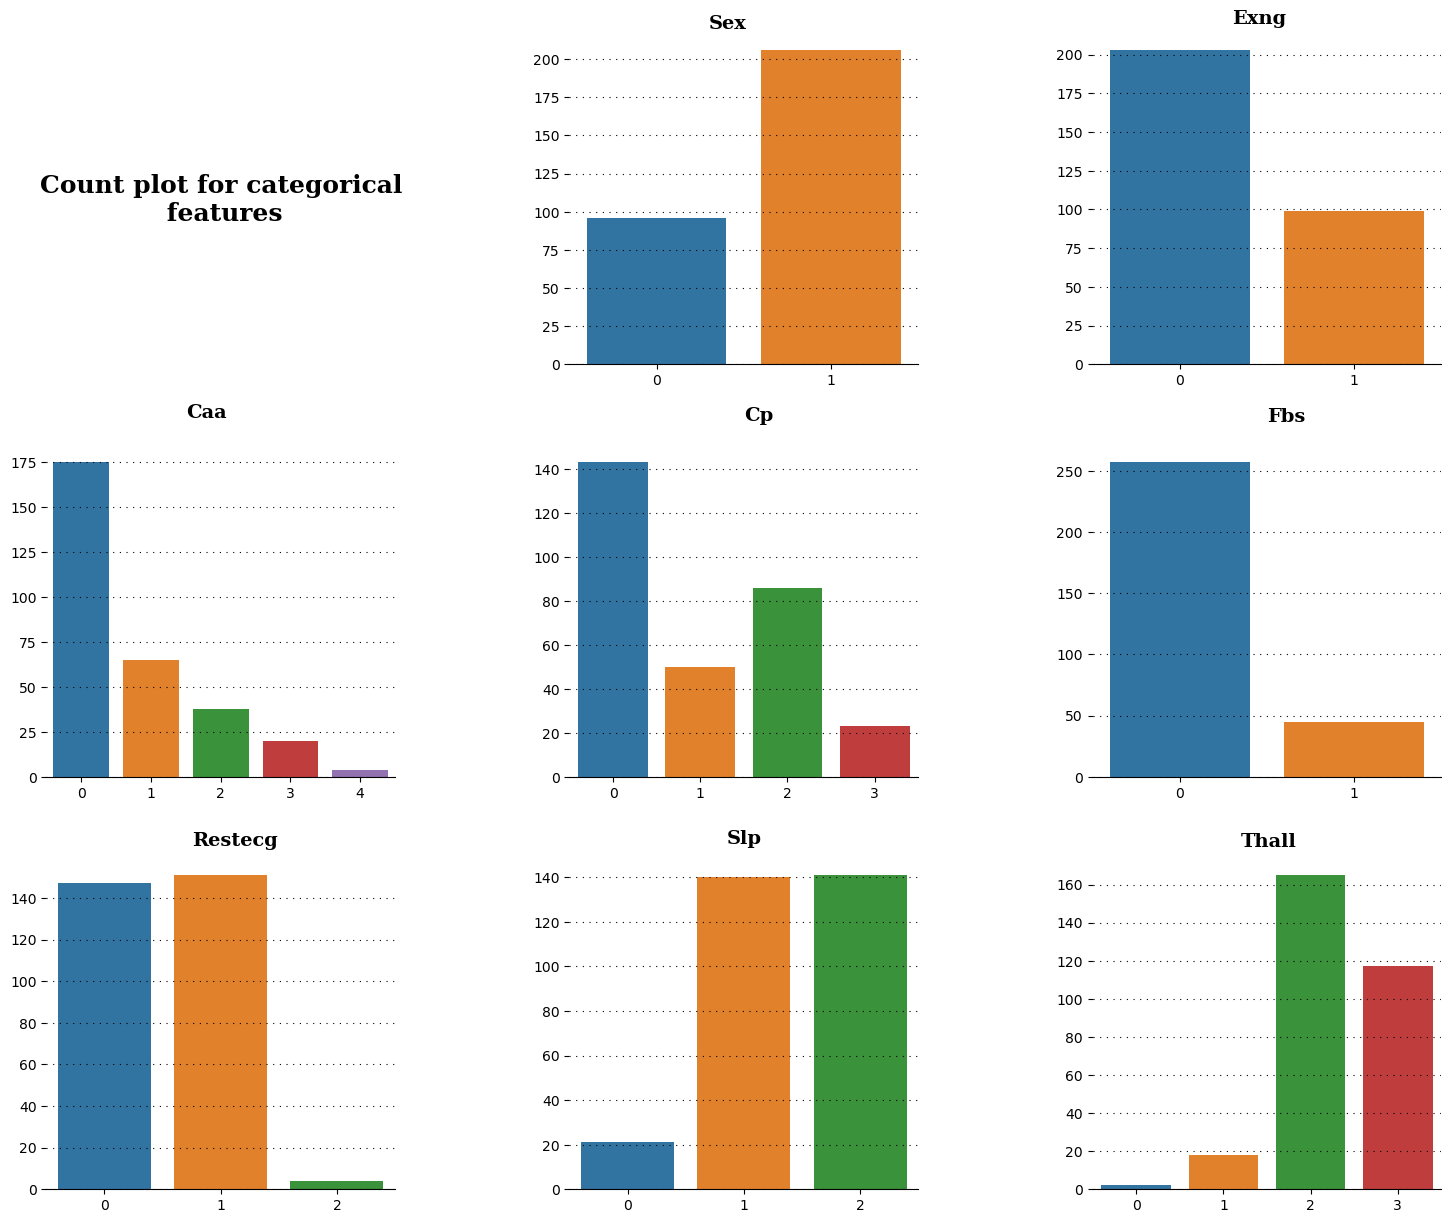

In [38]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for categorical\n features',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex')
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng')
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp')
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg')
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp')
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall')
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)
plt.show()

<AxesSubplot: xlabel='sex', ylabel='count'>

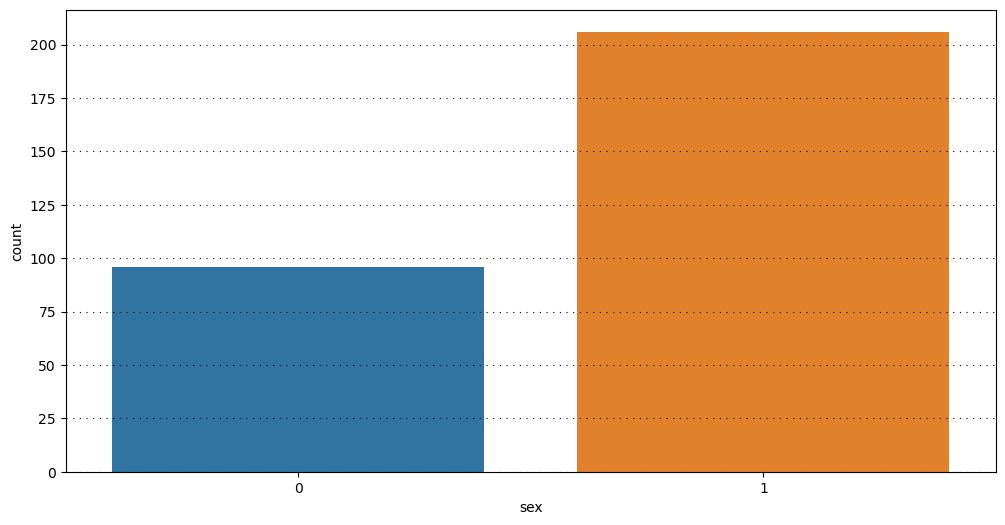

In [29]:
categorical_plot(df, "sex")

Observations:
* The number of people belonging to sex category "0" are 96 whereas "1" are 206.
* The number of people in category "1" are more than double than the "0" category.

<AxesSubplot: xlabel='cp', ylabel='count'>

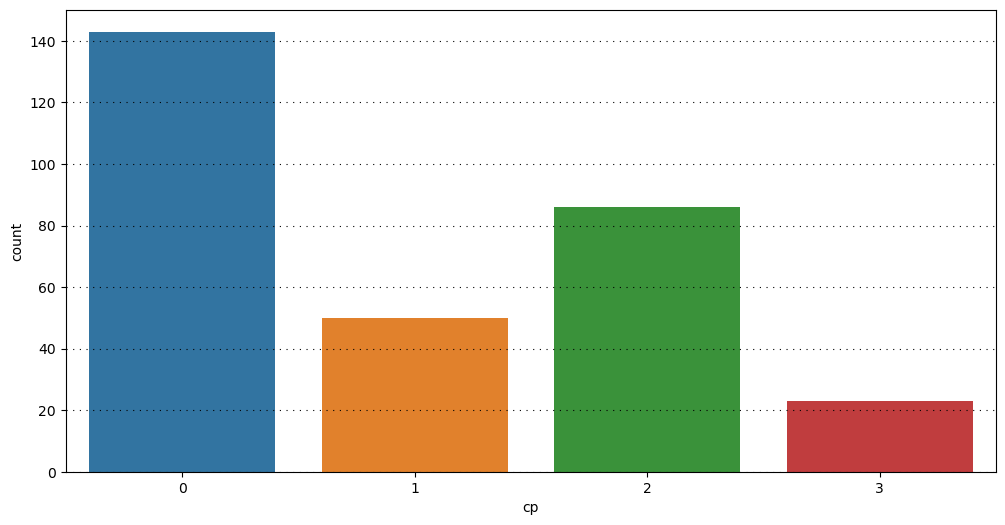

In [30]:
categorical_plot(df, "cp")

Observations:
* People of chest pain category '0' have the highest count, whereas of count of chest pain '3' is the lowest.

<AxesSubplot: xlabel='fbs', ylabel='count'>

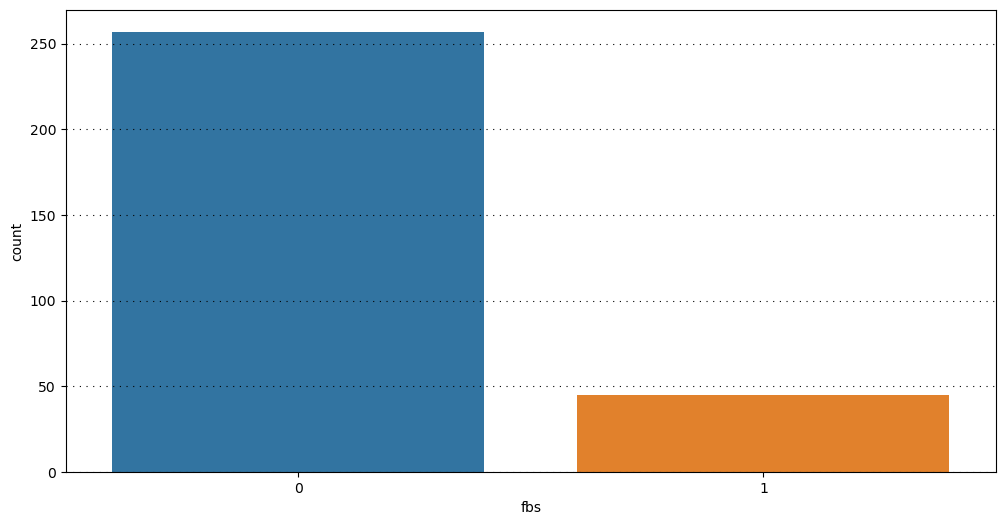

In [31]:
categorical_plot(df, "fbs")

Observations:
* People of fbs category "1" are less than 20% of people of fbs category "0".

<AxesSubplot: xlabel='thall', ylabel='count'>

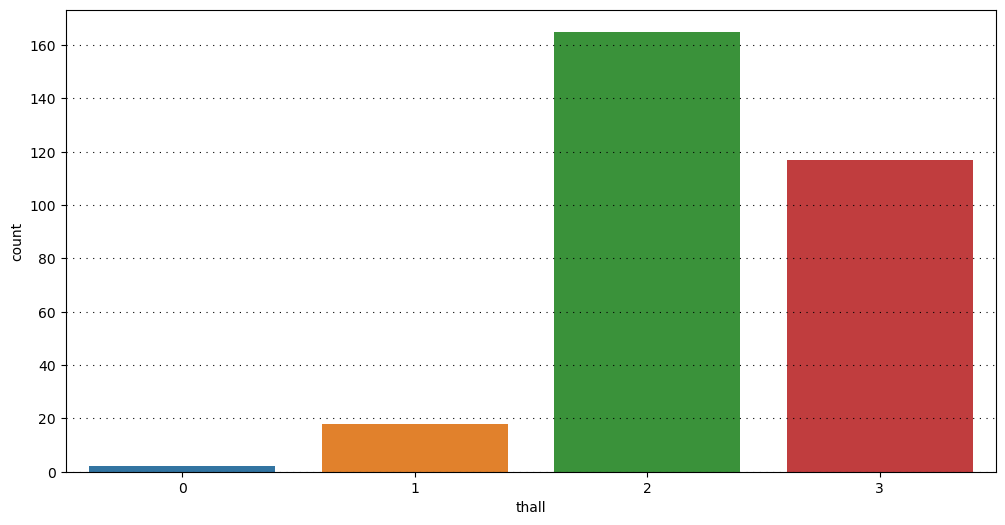

In [32]:
categorical_plot(df, "thall")

Observations:
* Thall count is maximum for type "2" (165) and min for type "0" (2).

<AxesSubplot: xlabel='restecg', ylabel='count'>

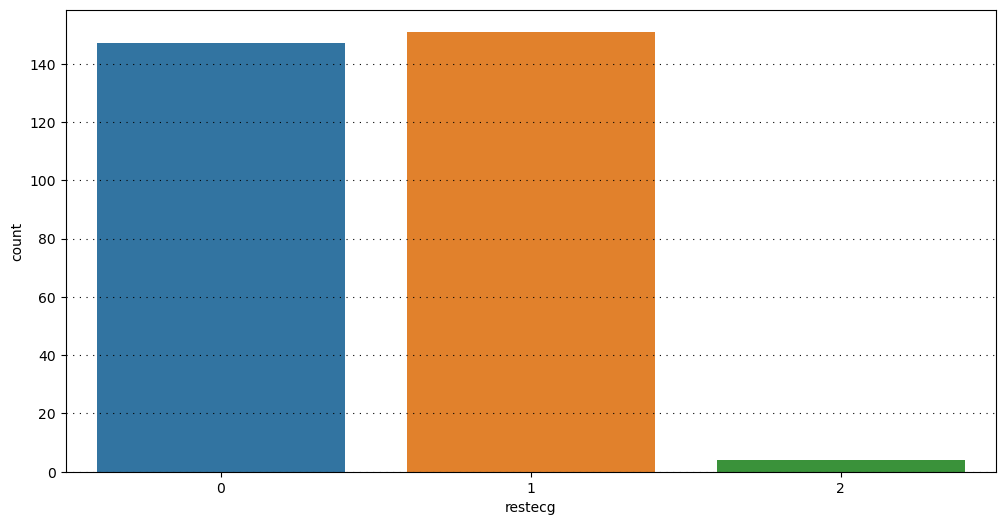

In [33]:
categorical_plot(df, "restecg")

Observations:
* restecg count is almost the same for type "0" and "1".
* Type "2" is almost nothing in comparison to "0" and "1"

<AxesSubplot: xlabel='caa', ylabel='count'>

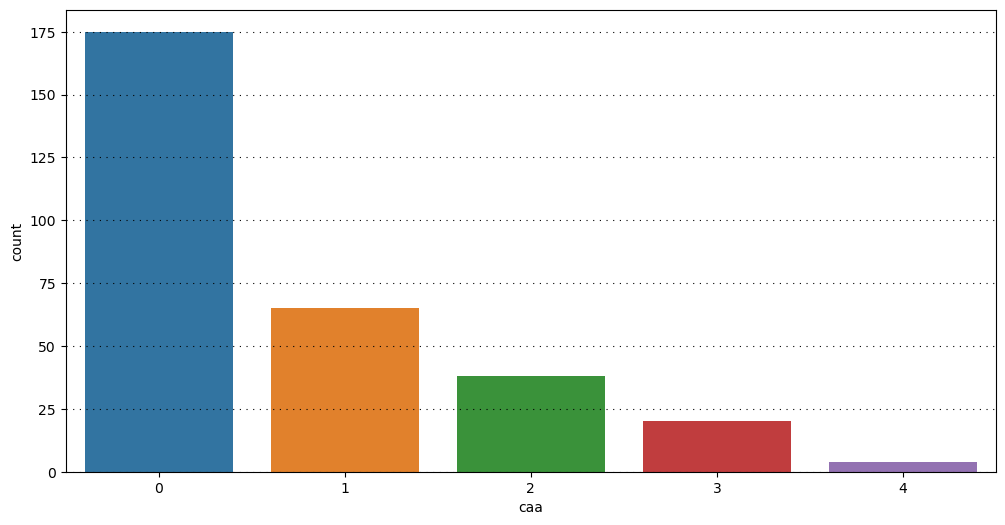

In [35]:
categorical_plot(df, "caa")

Observations:
* caa count is maximum for type "0" (175) and min for type "4" (~3).
* Type "0" counter at least 2 times bigger then others.

<AxesSubplot: xlabel='slp', ylabel='count'>

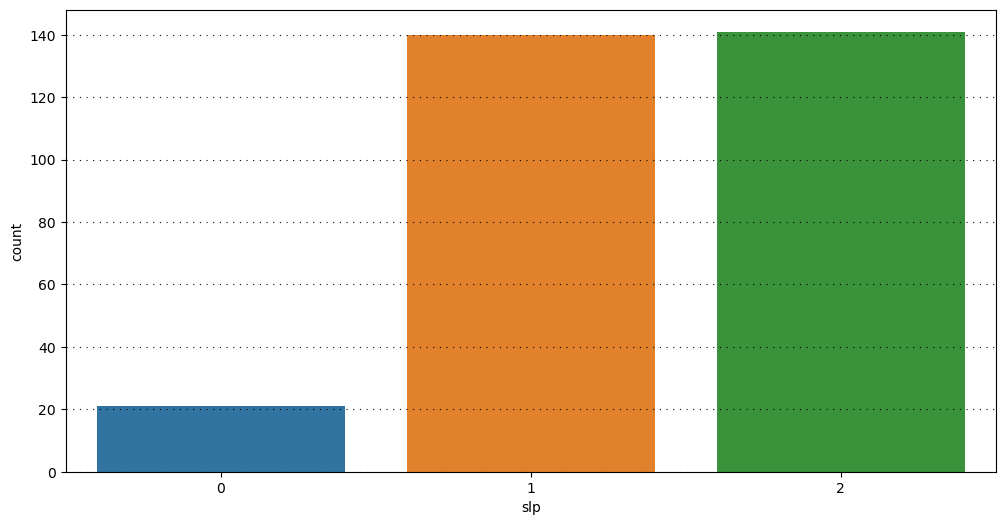

In [36]:
categorical_plot(df, "slp")

Observations:
* slp count is almost the same for type "1" and "2".
* Type "0" 7 times less

<AxesSubplot: xlabel='exng', ylabel='count'>

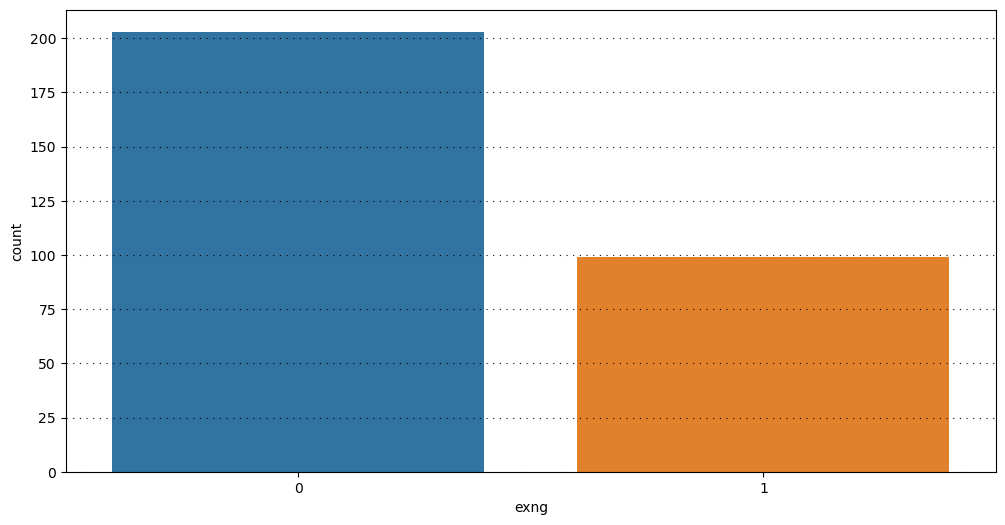

In [37]:
categorical_plot(df, "exng")

Observations:
* The number of people belonging to exng category "0" more then 200 whereas "1" are 98.
* The number of people in category "0" are more than double than the "1" category.

#### 3.1.2 Continuous features

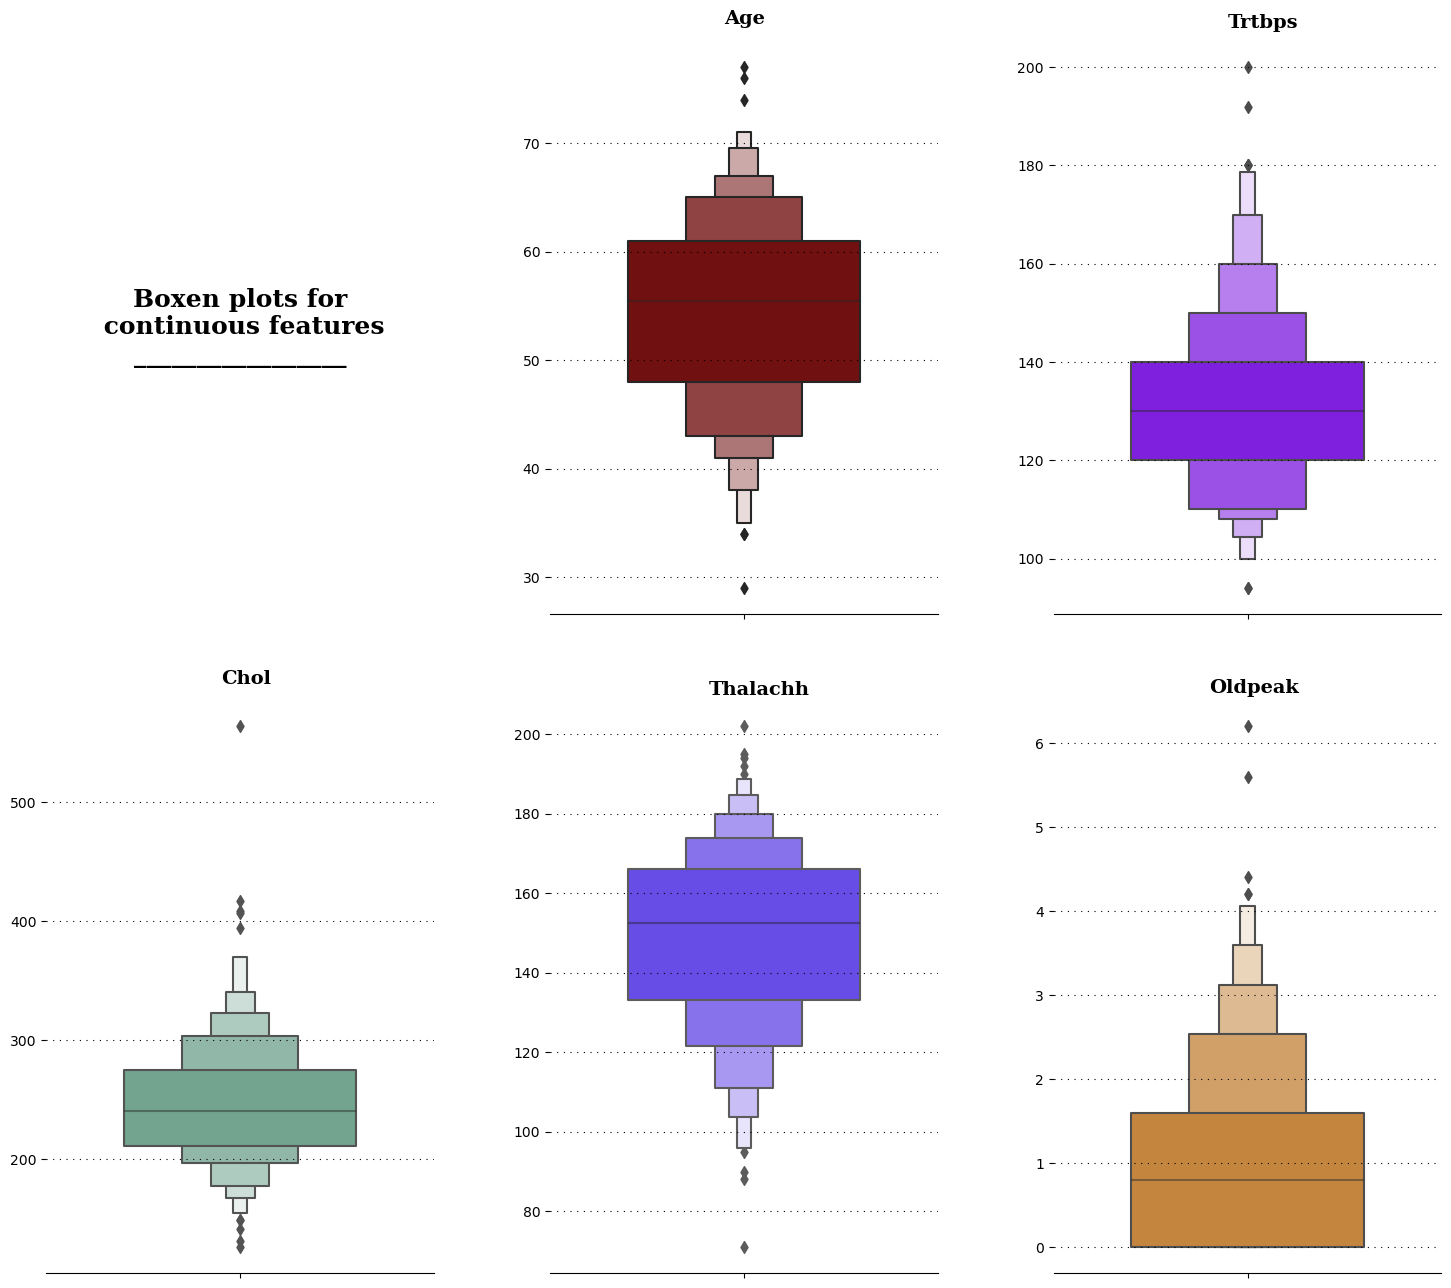

In [39]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plots for\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

#### 3.1.3 Output values

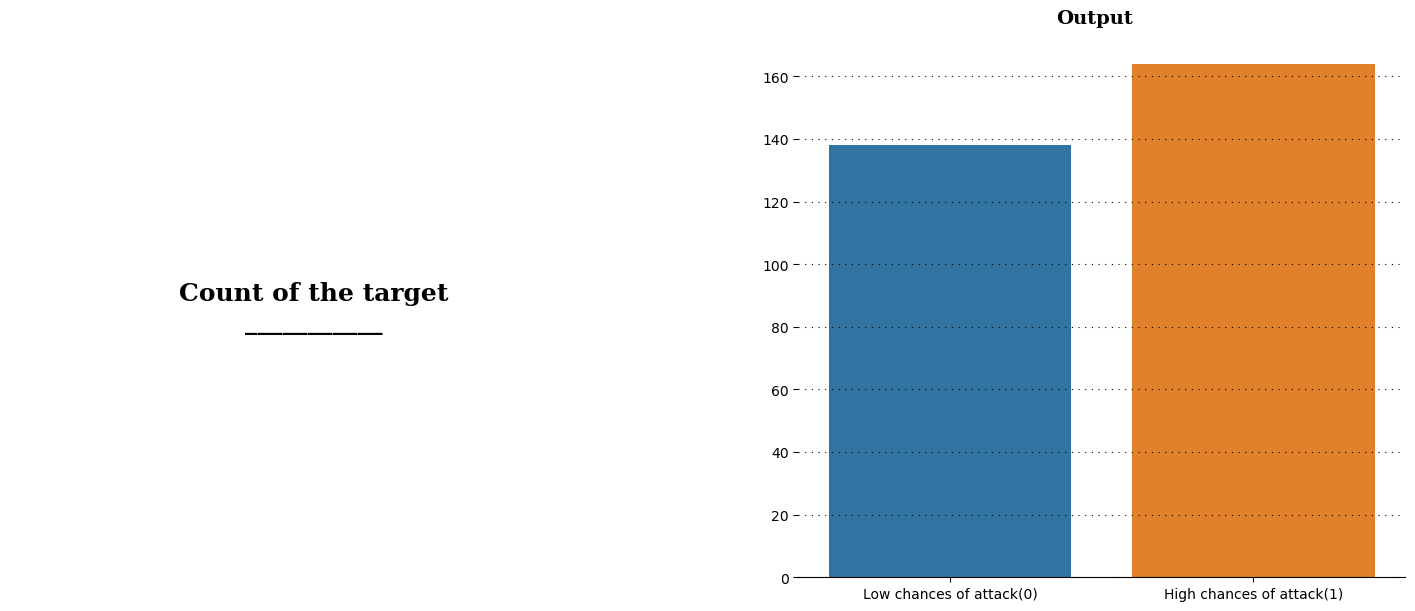

In [40]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#### 3.1.4 Distributions

ValueError: num must be 1 <= num <= 12, not 13

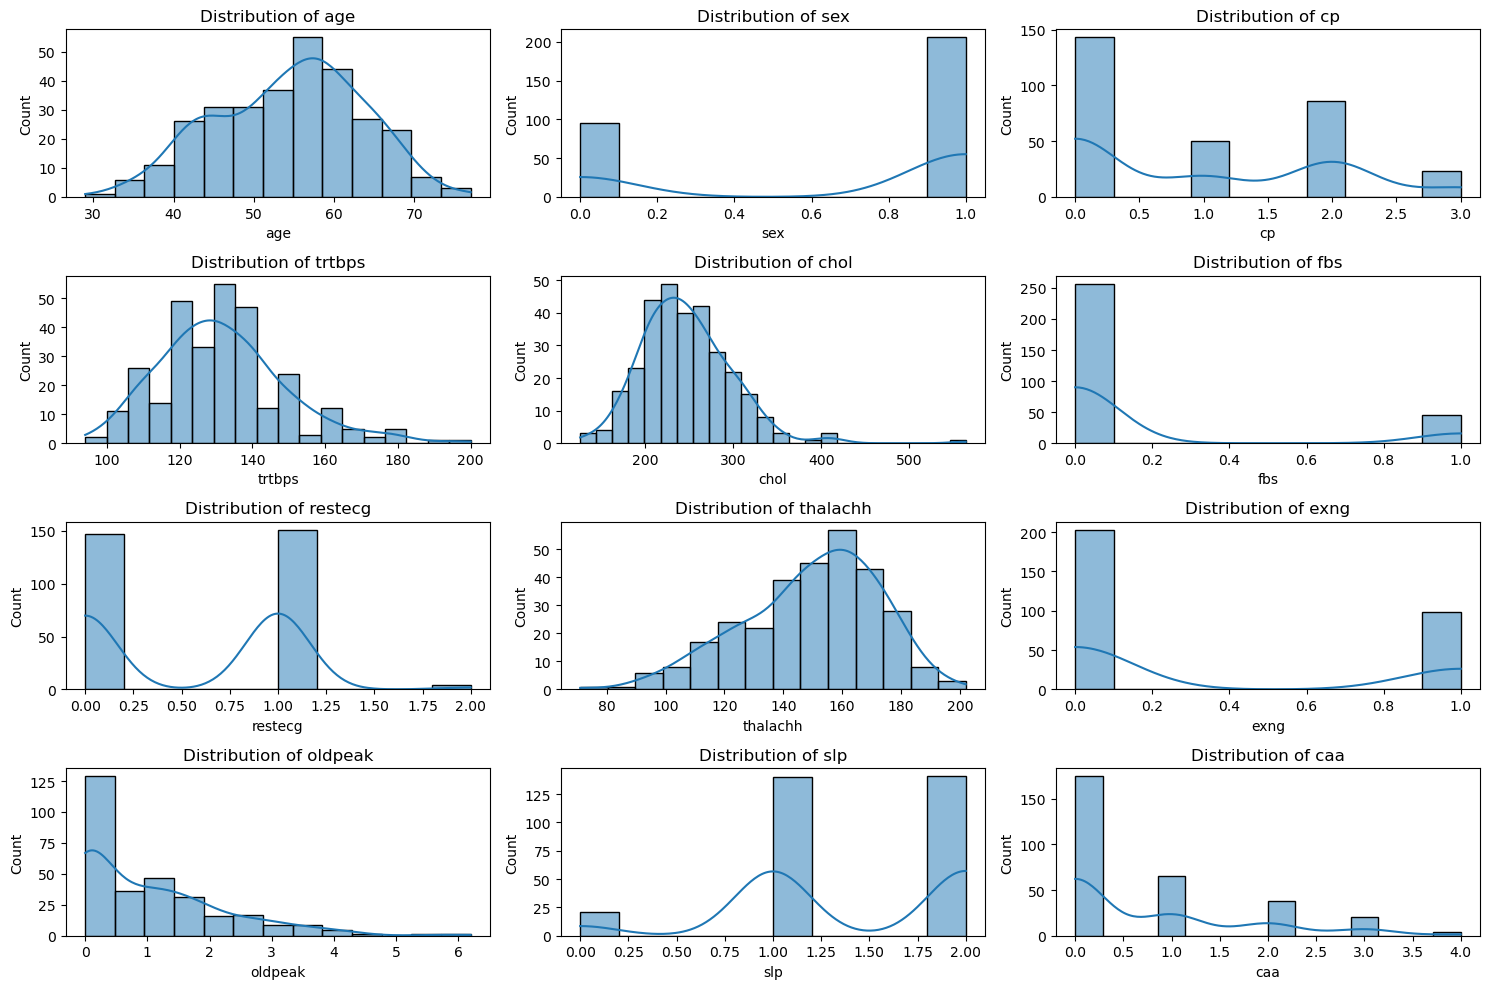

In [60]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

### 3.2. Bivariate Analysis

#### 3.2.1 Correlation matrix

In [52]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


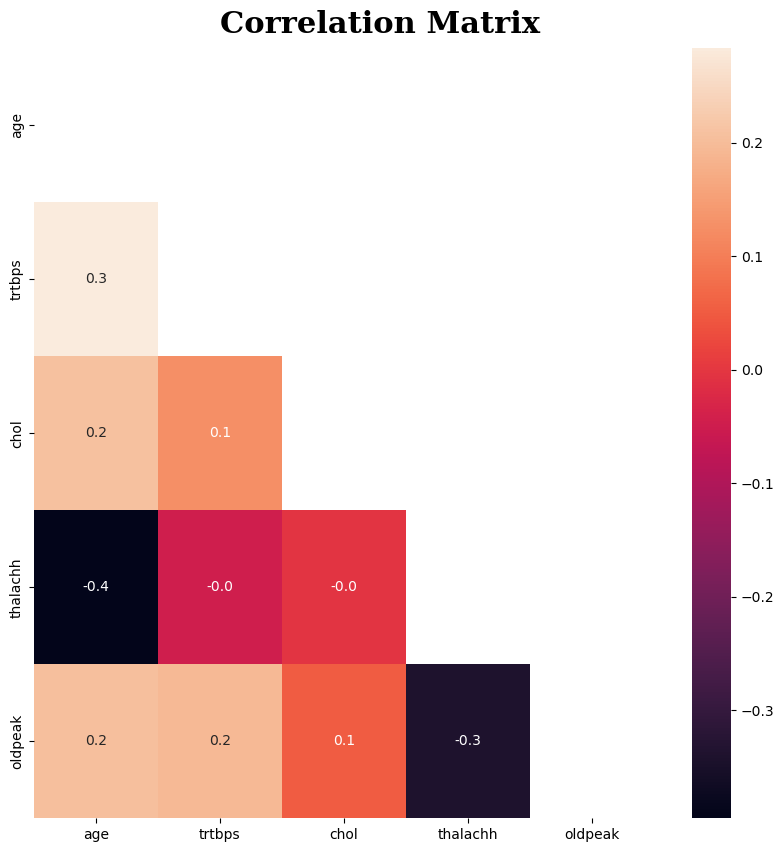

In [56]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True)
plt.show()

#### 3.2.2 Distributions according to output variable

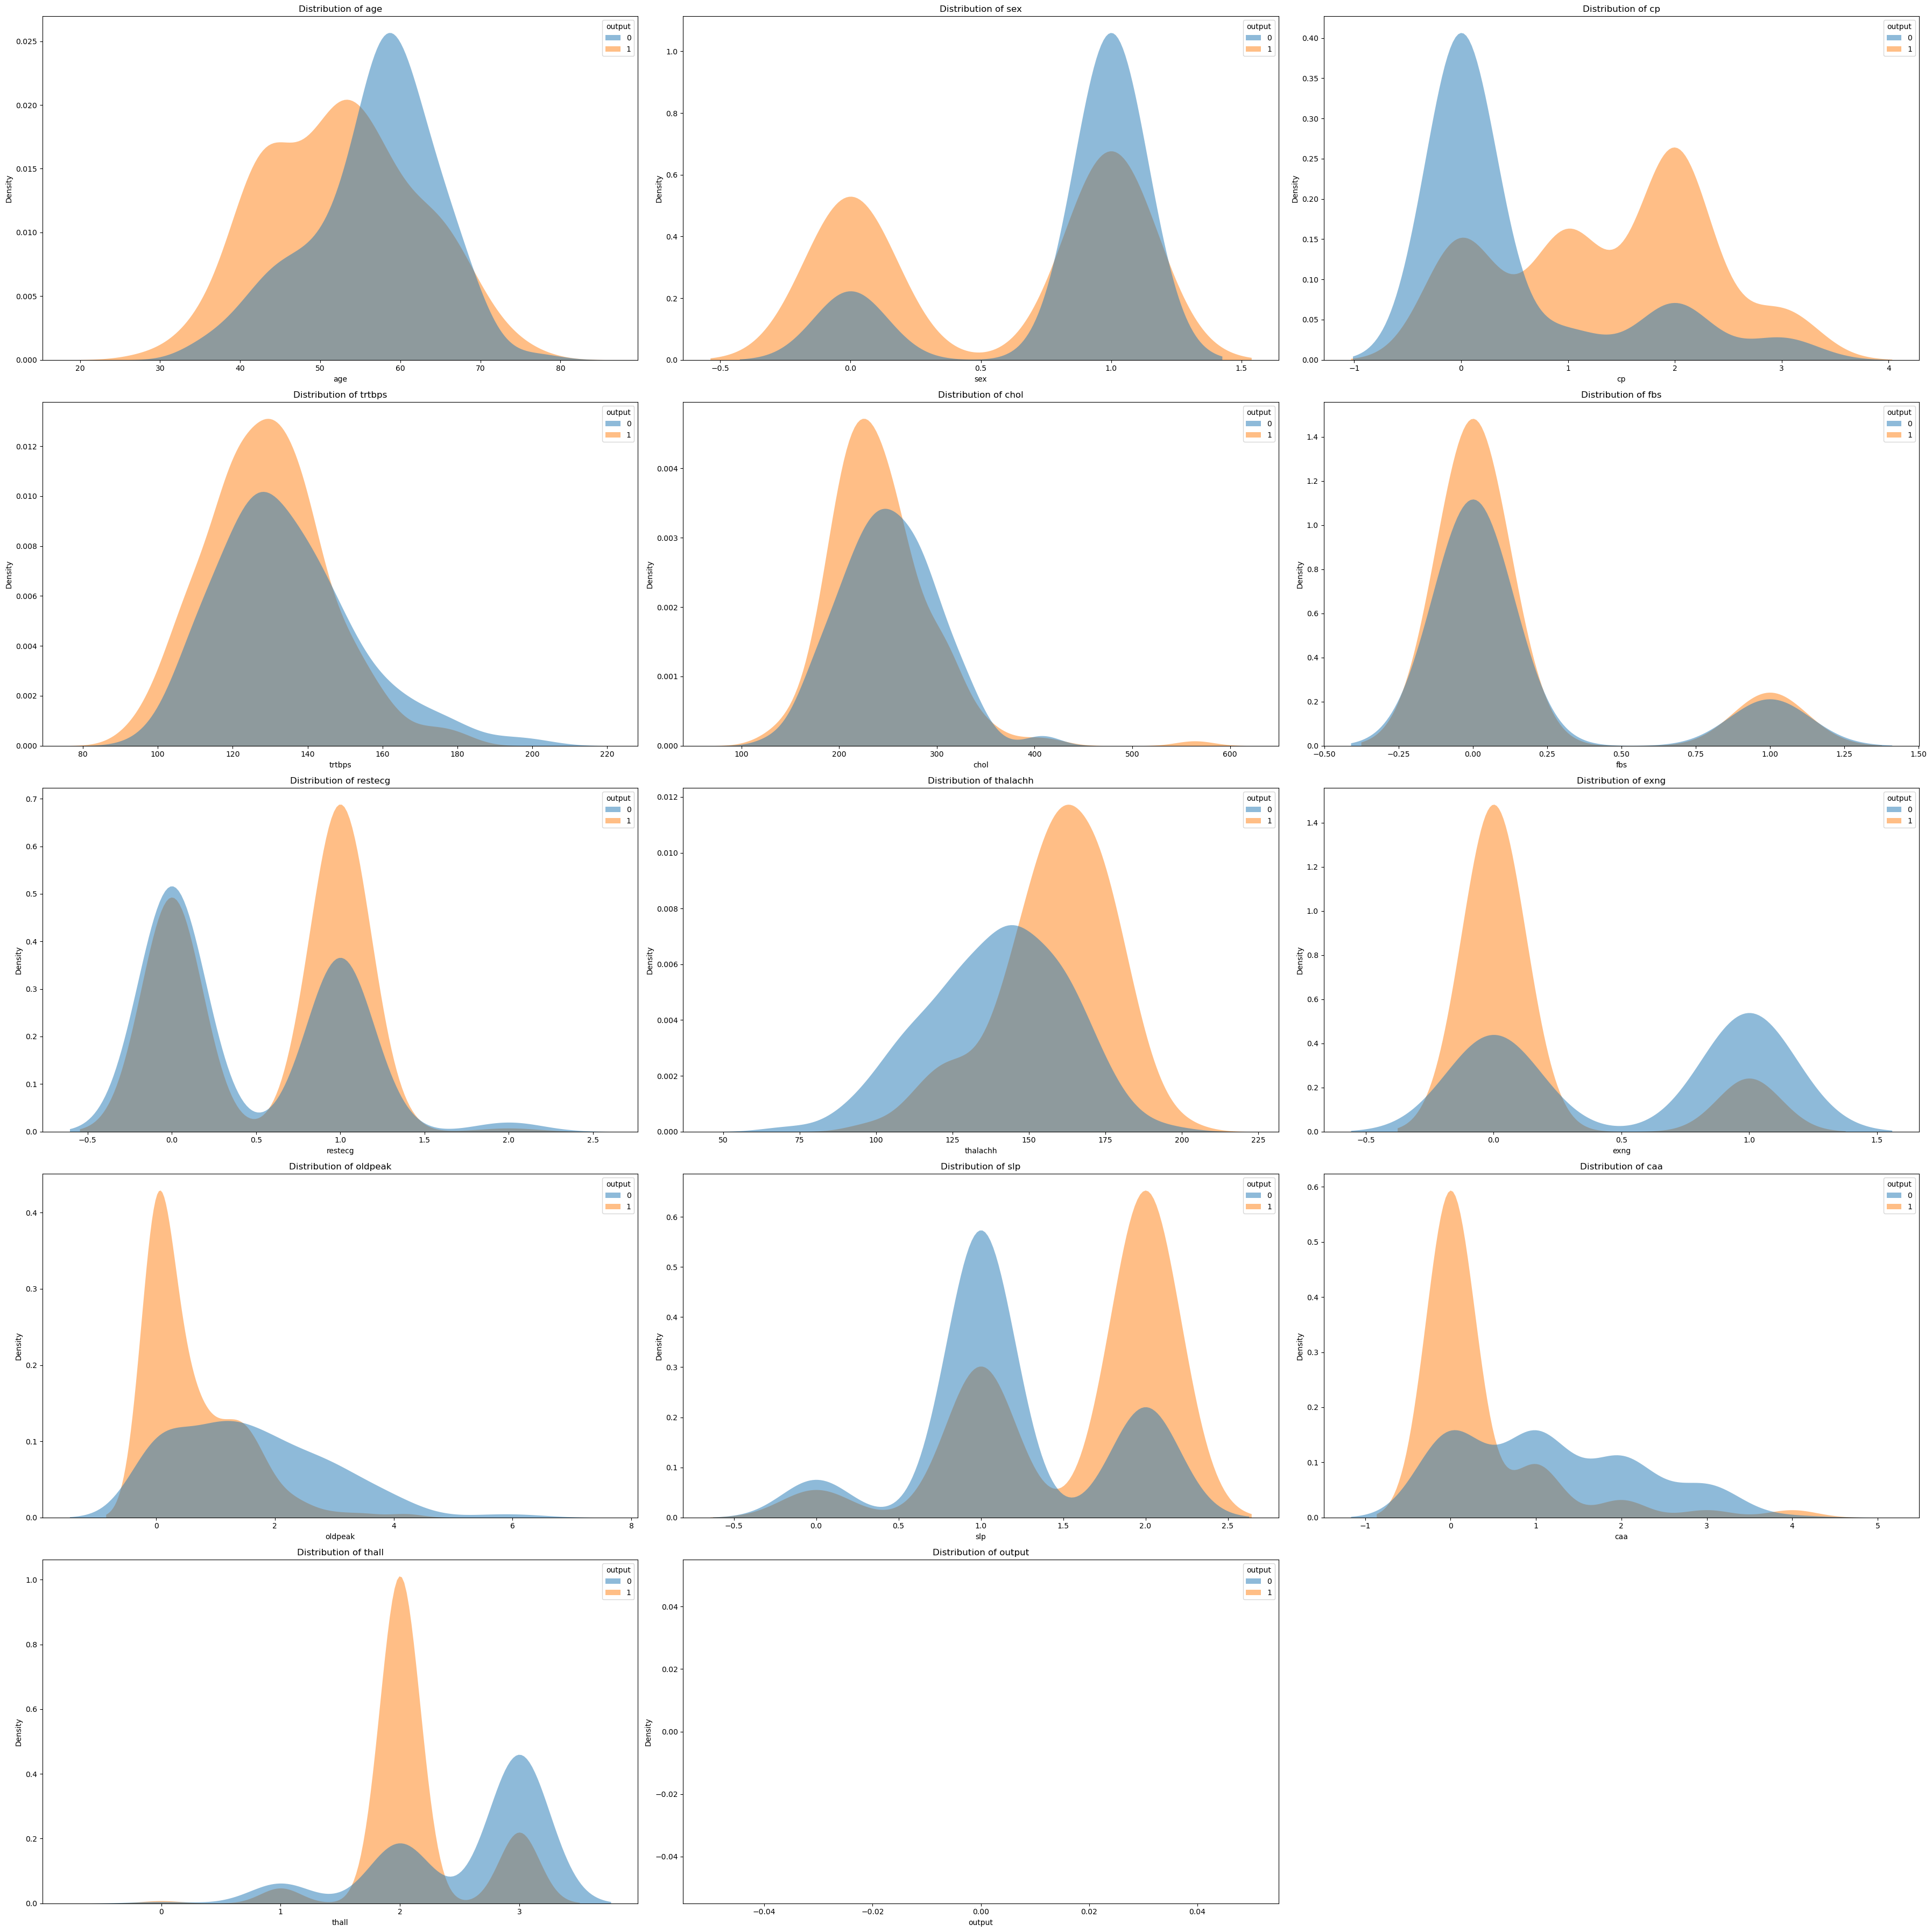

In [70]:
plt.figure(figsize=(36,36))
for i,col in enumerate(df.columns,1):
    plt.subplot(5,3,i)
    plt.title(f"Distribution of {col}")
    sns.kdeplot(data=df, x=col,hue="output", fill=True, alpha=.5, linewidth=0)
    plt.tight_layout()
    plt.plot()

#### 3.2.3 Pairplot according to target variable

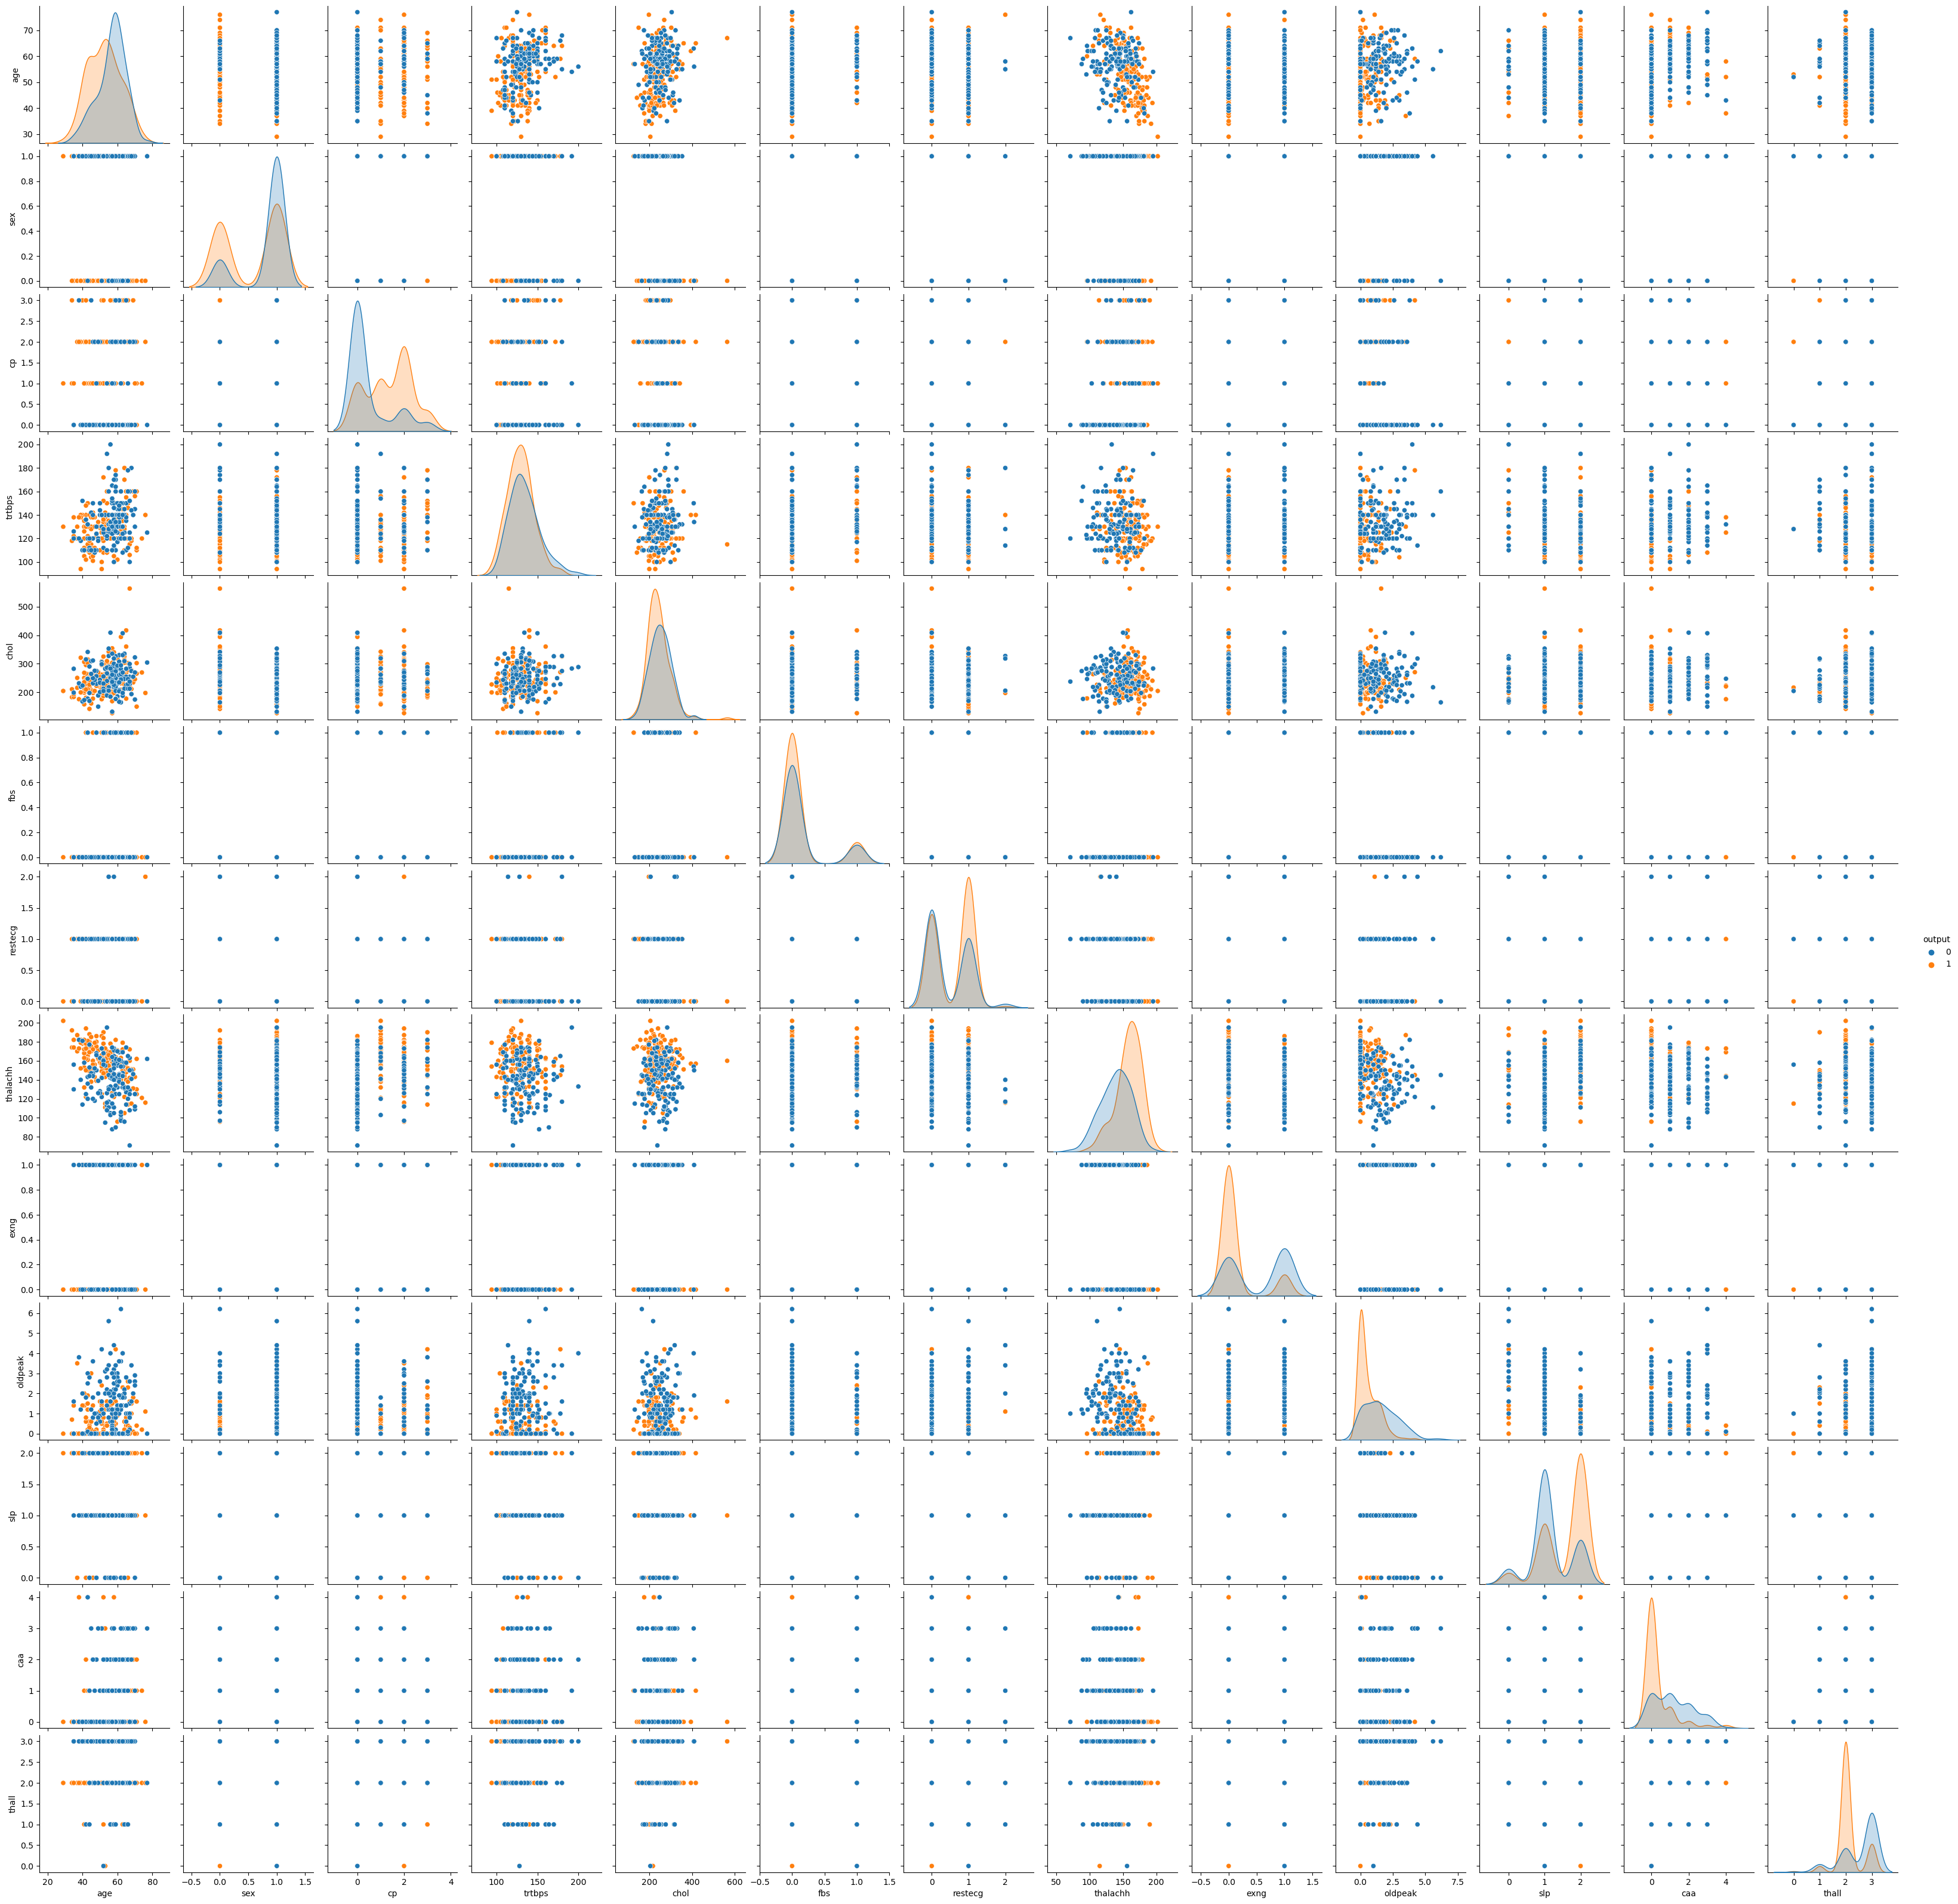

In [71]:
sns.pairplot(df,hue='output')
plt.show()

### Conclusions

* There are no NaN values in the data.
* There are certain outliers in all the continuous features.
* The data consists of more than twice the number of people with sex = 1 than sex = 0.
* There is no apparent linear correlation between continuous variable according to the heatmap.
* It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt * output, it is evident that this isn't the case.
* According to the distribution plot of thalachh wrt output, people with higher maximum heart rate achieved have higher chances of  heart attack.
* According to the distribution plot of oldpeak wrt output, people with lower pevious peak achieved have higher chances of heart * attack.


### 4. Data processing

Preprocessing incudes several steps:
* Handling of null values
* Outlier handling
* Categorical features encoding
* Feature scaling

#### 4.1 Handling Null Values

On this step we need to handle any null (NaN) values in our dataset if we did not do it previously.

Our dataset hasn't any null values, so we skip it.


#### 4.2 Outliers

As it was shown on boxenplots, there are some outliers.
There are 2 ways of handling:
* Remove them
* Scale them in a way that they don't change the results.

Our dataset is relative small, so we will use the second approach.
we can use Robust Scaling for scakling our data, It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. RobustScaler uses the interquartile range so that it is robust to outliers.



#### 4.2 Categorical features encoding

All our categorical features are already encoded by the dataset.

#### 4.3 Feature scaling